In [2]:
# IMPORTANDO BIBLIOTECAS
import numpy as np
import pandas as pd

**Carregando o conjunto de dados em um quadro de dados usando Pandas**

In [3]:
#CARREGANDO O ARQUIVO COM PANDAS
df=pd.read_csv('agricultural_raw_material.csv')

**Explorando o conjunto de dados**

In [4]:
df.info
#VERIFICANDO VALORES NULOS
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

**Lidar com dados ausentes, incorretos e inválidos**

In [12]:
# Removendo caracteres especiais (% , -) de todas as colunas usando expressões regulares
# Substituindo strings vazias por NaN durante o processo de remoção de caracteres

df = df.replace('%', '', regex=True)
df = df.replace(',', '', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

# Eliminando linhas que contêm valores NaN

df = df.dropna()

# Verificando se existem valores NaN restantes no DataFrame

df.isnull().sum()

# Convertendo colunas específicas para o tipo de dados float

lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")

# Verificando os tipos de dados das colunas no DataFrame

df.dtypes

Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64
dtype: object

In [14]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


**Colunas de data e horacolunas**

formatando a coluna datetime e definindo-a como índice para o conjunto de dados

In [7]:
df.Month  = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
# Indexing month mês
df = df.set_index('Month')

In [8]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,7.23,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


Análise Exploratória e Visualização
Vamos começar importando **matplotlib.pyplot e seaborn**.

In [9]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Mapa de calor**

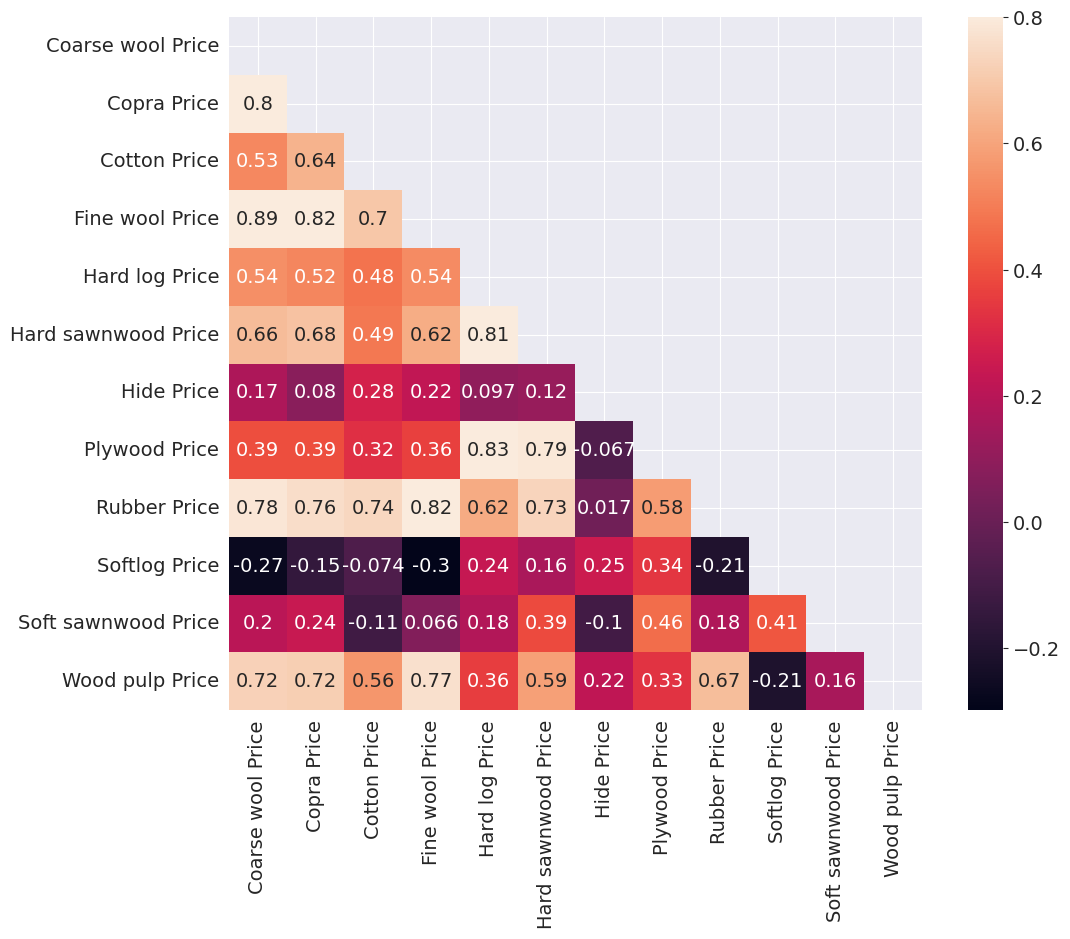

In [16]:
# Lista de variáveis relacionadas a matérias-primas
raw_data = ['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price', 'Hard sawnwood Price',
            'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']

# Obtendo a matriz de correlação entre as variáveis
corrmat = df[raw_data].corr()

# Configurando o tamanho do gráfico
fig = plt.figure(figsize=(12, 9))

# Máscara para ocultar a parte superior da matriz, pois ela é simétrica (repetitiva)
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# Criando um mapa de calor usando seaborn
sns.heatmap(corrmat, vmax=0.8, mask=mask, square=True, annot=True)

# Exibindo o gráfico
plt.show()


O mapa de calor mostra a correlação entre as matérias-primas maior o valor correlacionado maior chance de serem duas matérias-primas relacionadas, mas não necessariamente

Explore uma ou mais colunas traçando um gráfico abaixo e adicione alguma explicação sobre ele Matriz de correlação

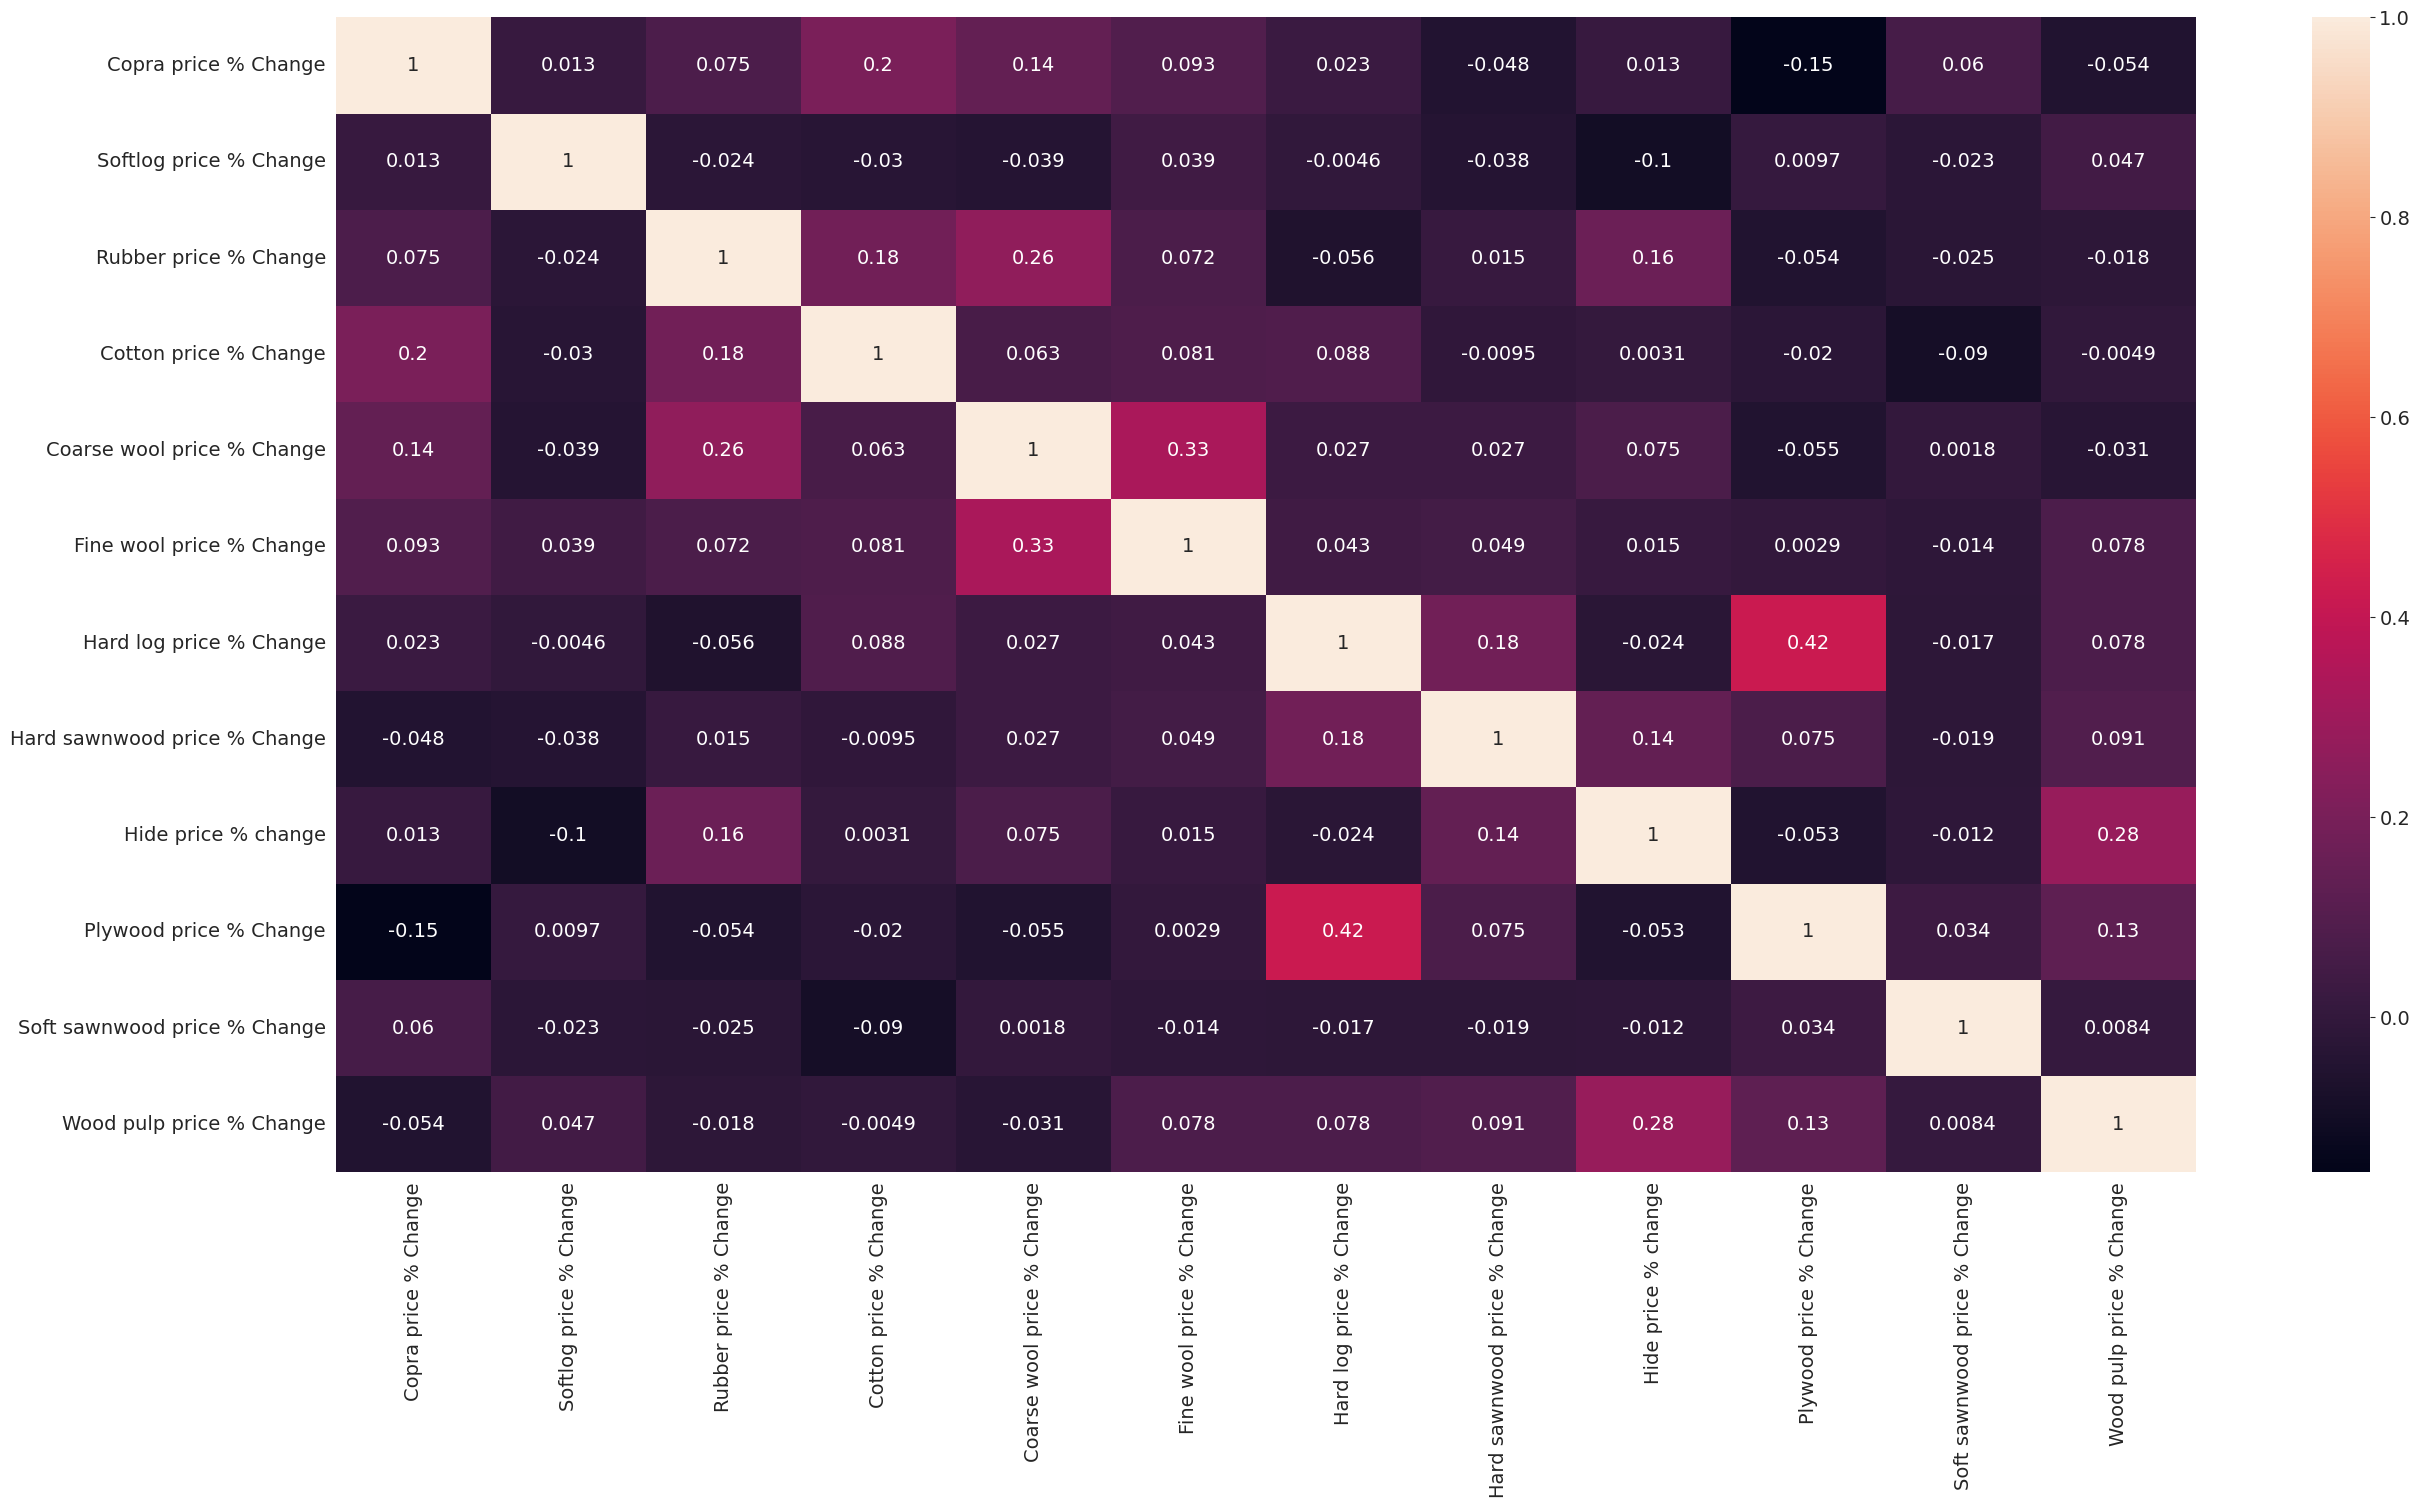

In [17]:
# Configurando o tamanho do gráfico
plt.figure(figsize=(30, 15))

# Lista de variáveis de mudança percentual
changelist = ['Copra price % Change', 'Softlog price % Change', 'Rubber price % Change', 'Cotton price % Change',
              'Coarse wool price % Change', 'Fine wool price % Change', 'Hard log price % Change',
              'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change',
              'Soft sawnwood price % Change', 'Wood pulp price % Change']

# Gerando a matriz de correlação para o conjunto de dados completo
corrMatrix = df[changelist].corr()

# Criando um mapa de calor usando seaborn
sns.heatmap(corrMatrix, annot=True)

# Exibindo o gráfico
plt.show()


A partir deste gráfico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-primas

* o valor negativo implica que duas variáveis ​​estão negativamente correlacionadas (um aumento, outro decréscimo)
* Zero implica nenhuma relação
* caso contrário, maior o valor maior a chance de relação.
preços e seus gráficos de % de mudança

**Lã grossa**

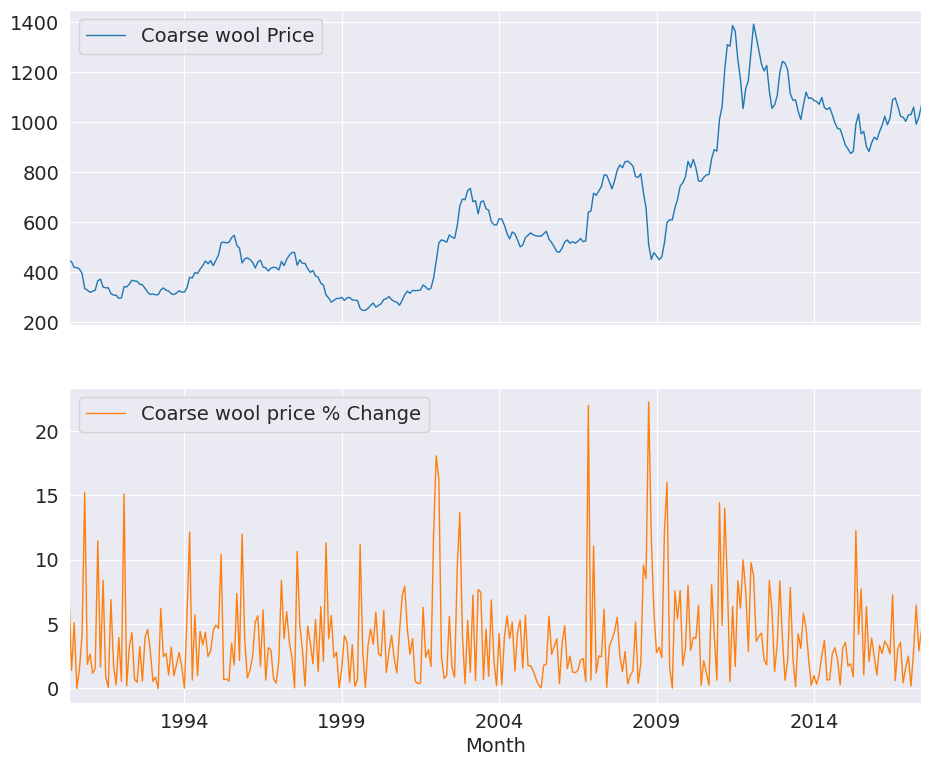

In [18]:
# Selecionando as colunas "Coarse wool Price" e "Coarse wool price % Change" do DataFrame
selected_columns = df[["Coarse wool Price", "Coarse wool price % Change"]]

# Criando um gráfico de linhas para as colunas selecionadas
axes = selected_columns.plot(figsize=(11, 9), subplots=True, linewidth=1)

# Exibindo o gráfico
plt.show()


Da mesma forma, podemos encontrar a visualização de todos os outros recursos fornecidos no conjunto de dados.

##Fazendo e respondendo perguntas##
**Q1: Descubra a variação normal do preço de cada matéria-prima**

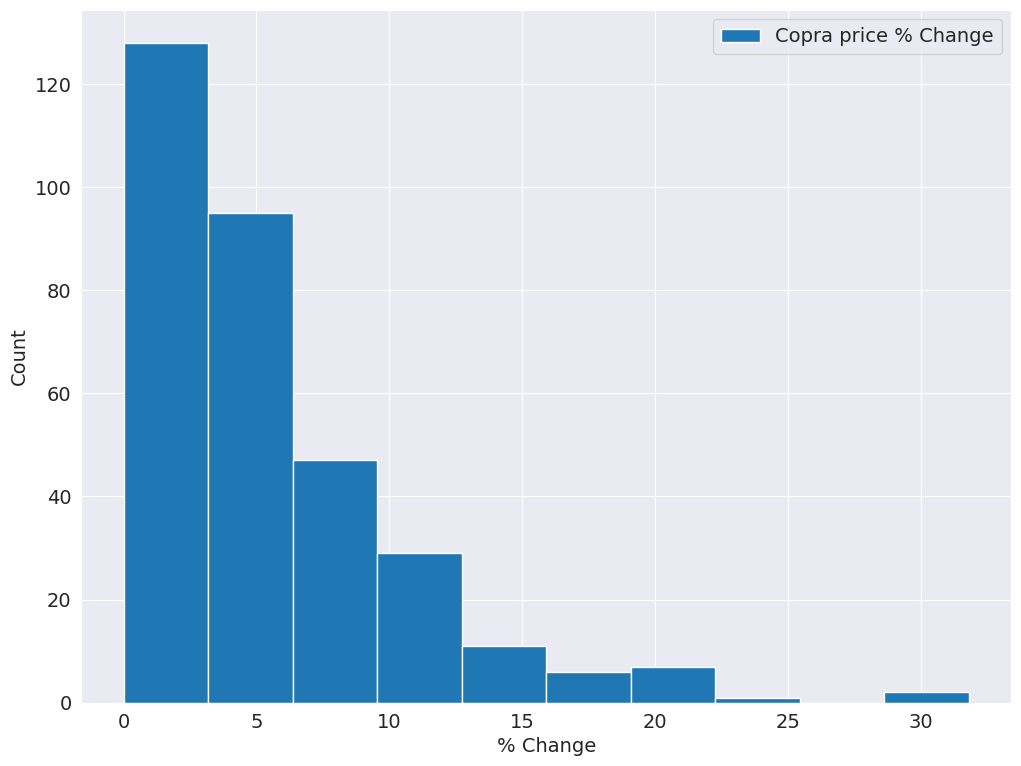

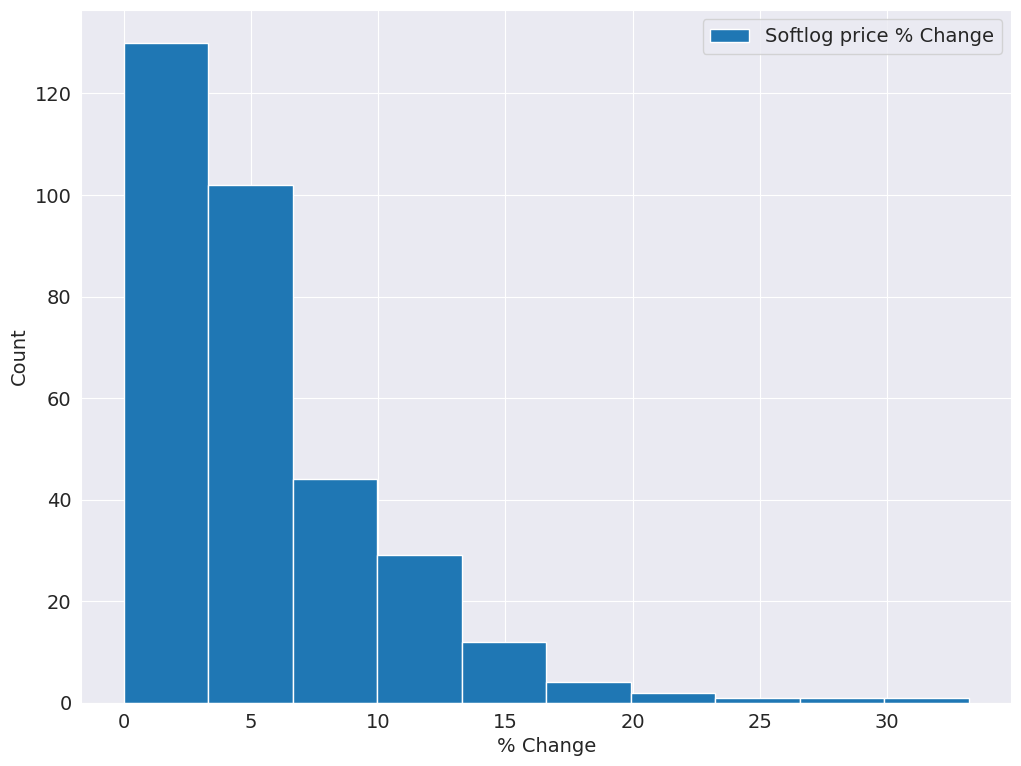

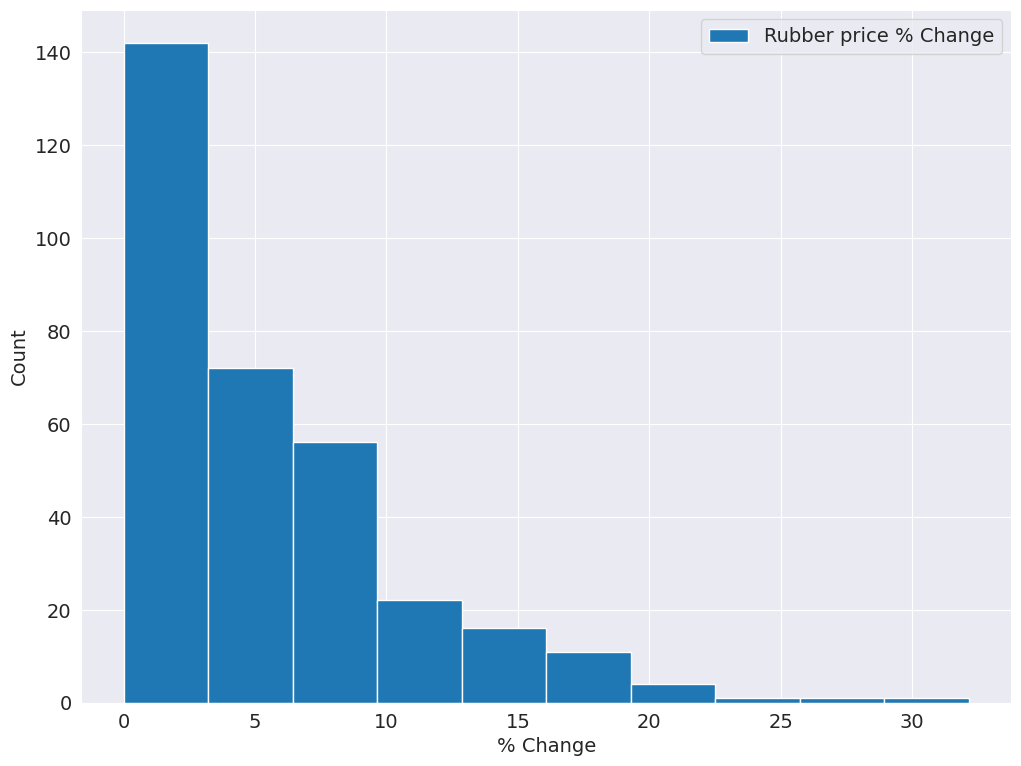

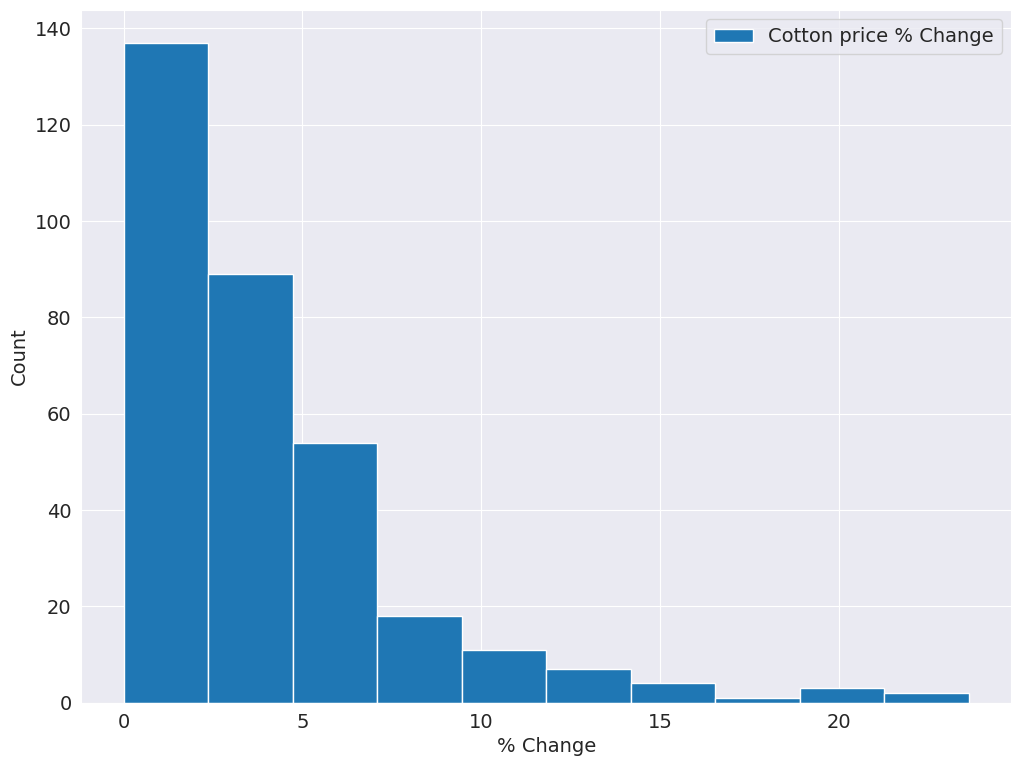

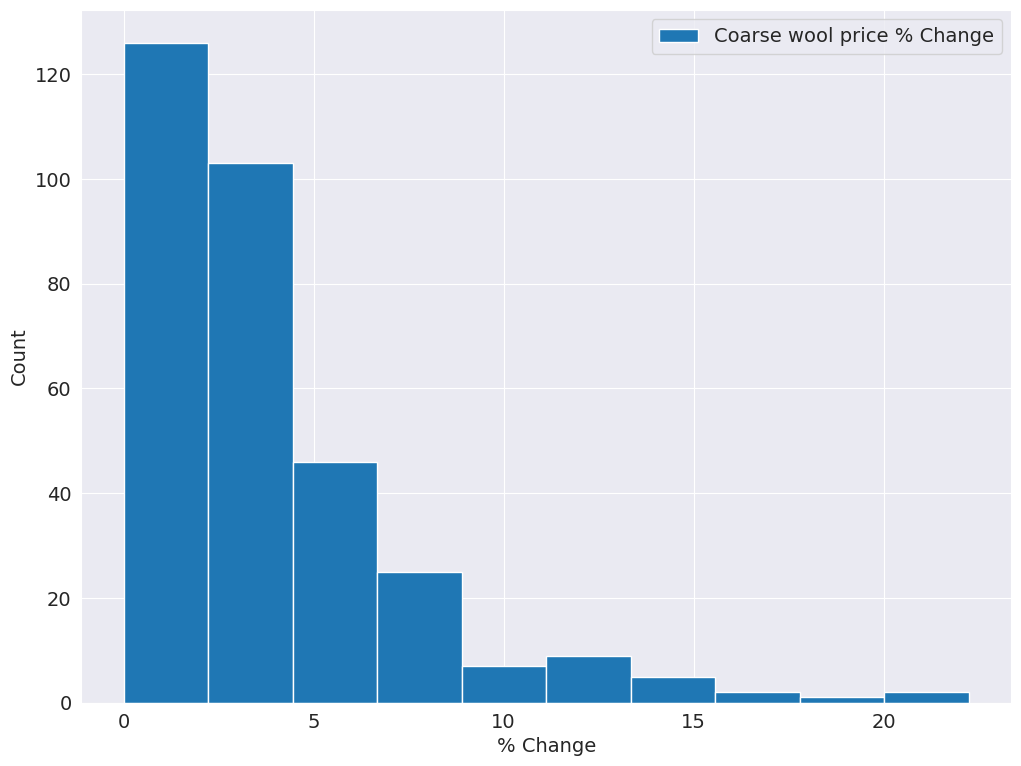

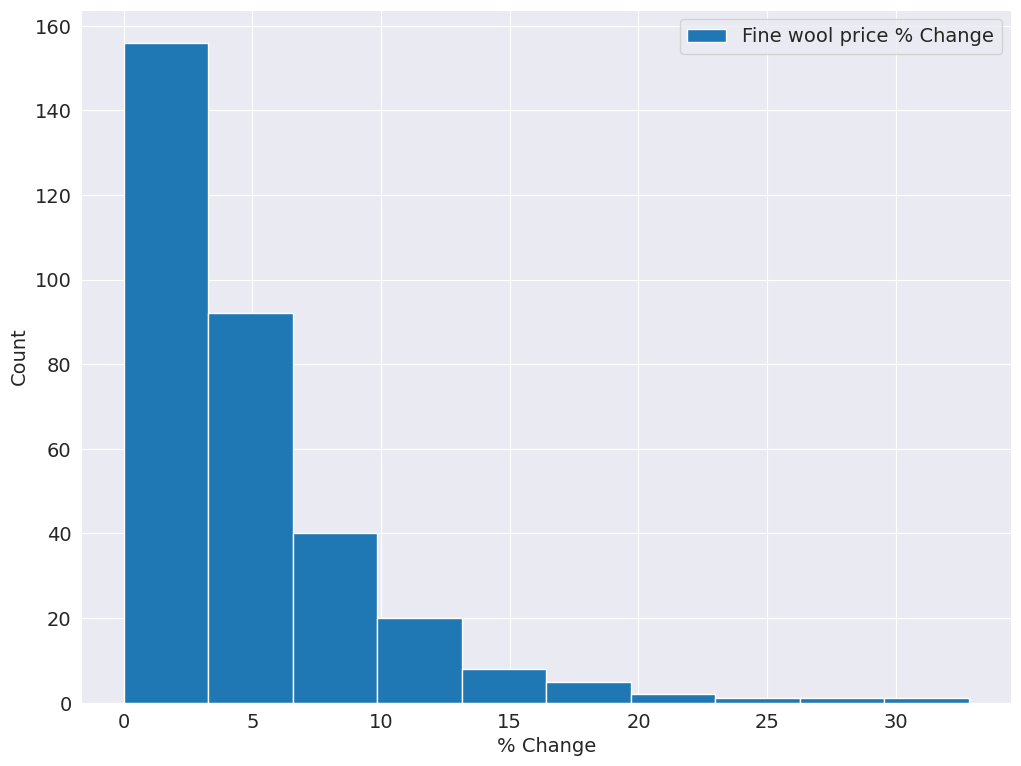

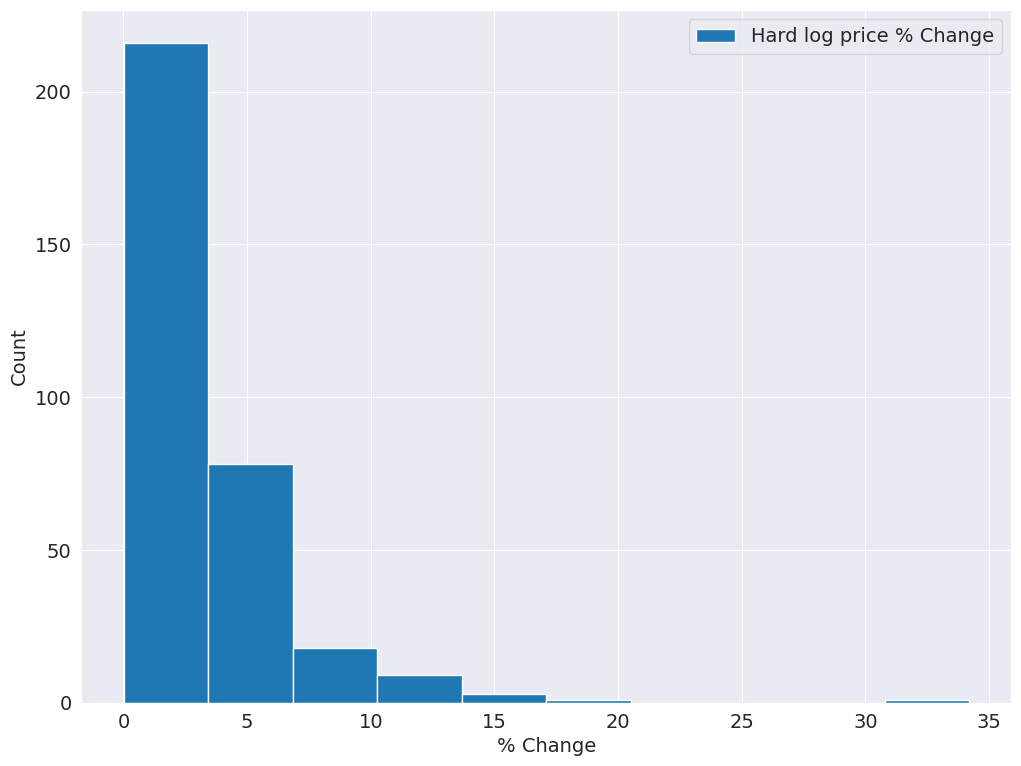

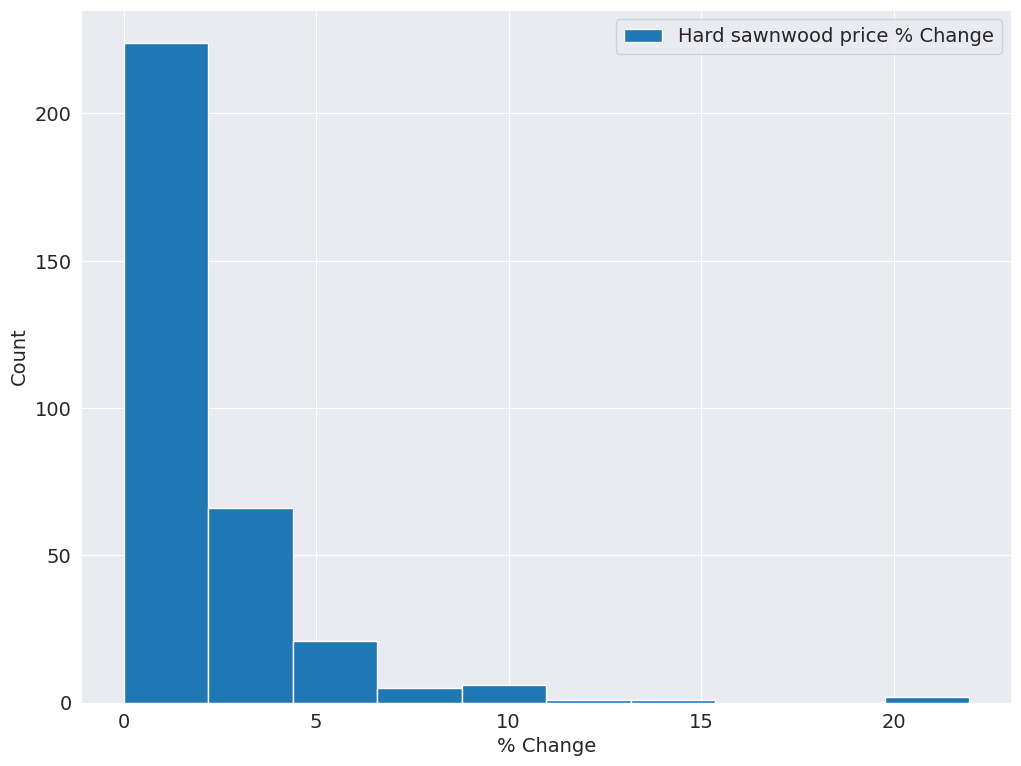

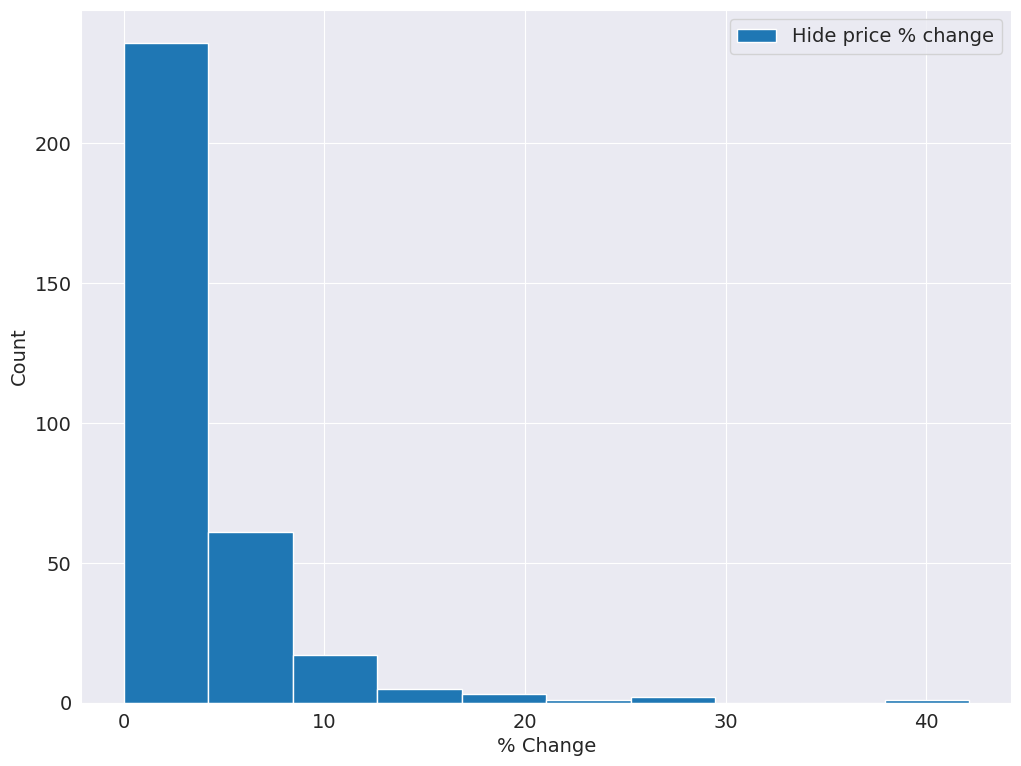

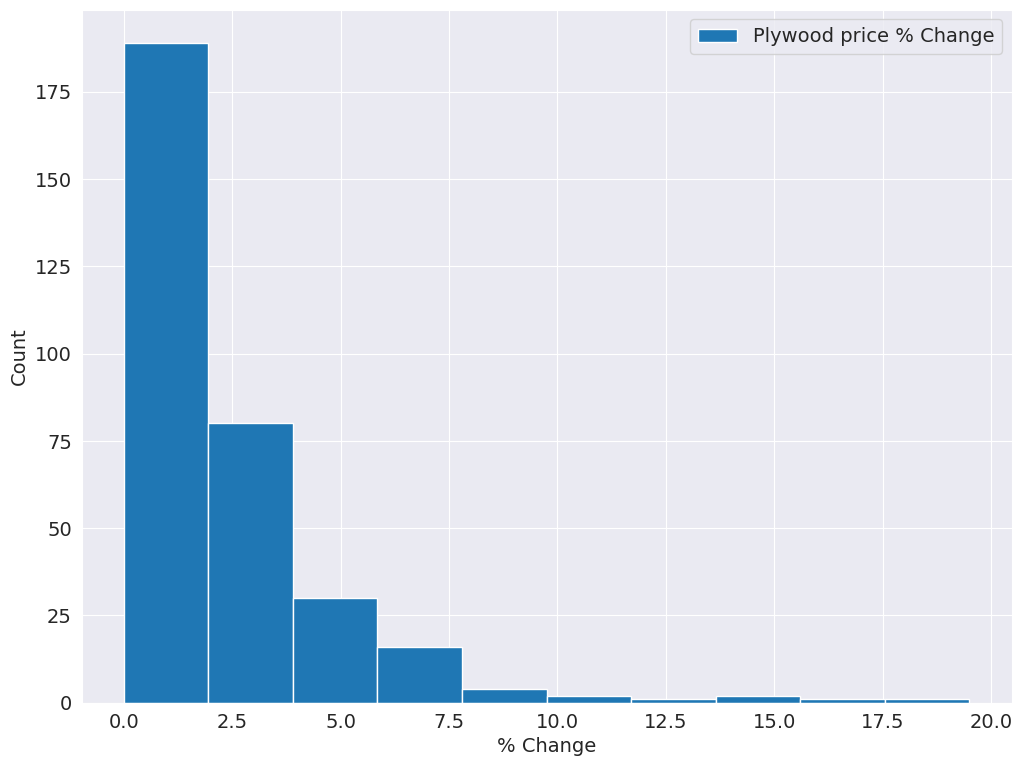

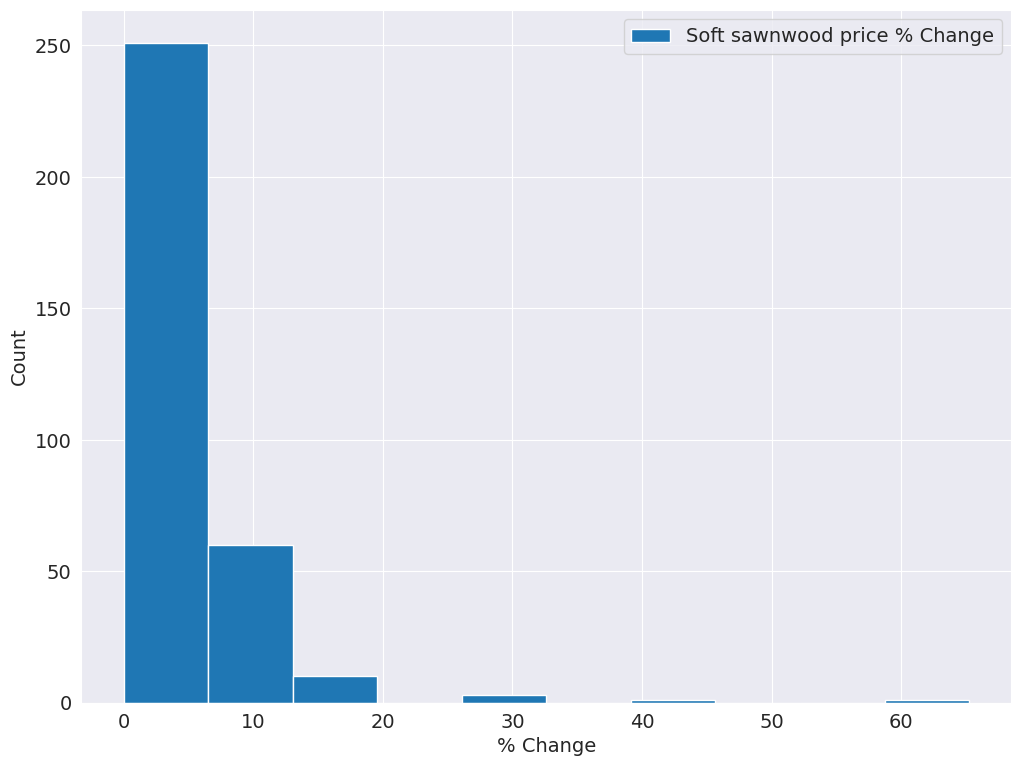

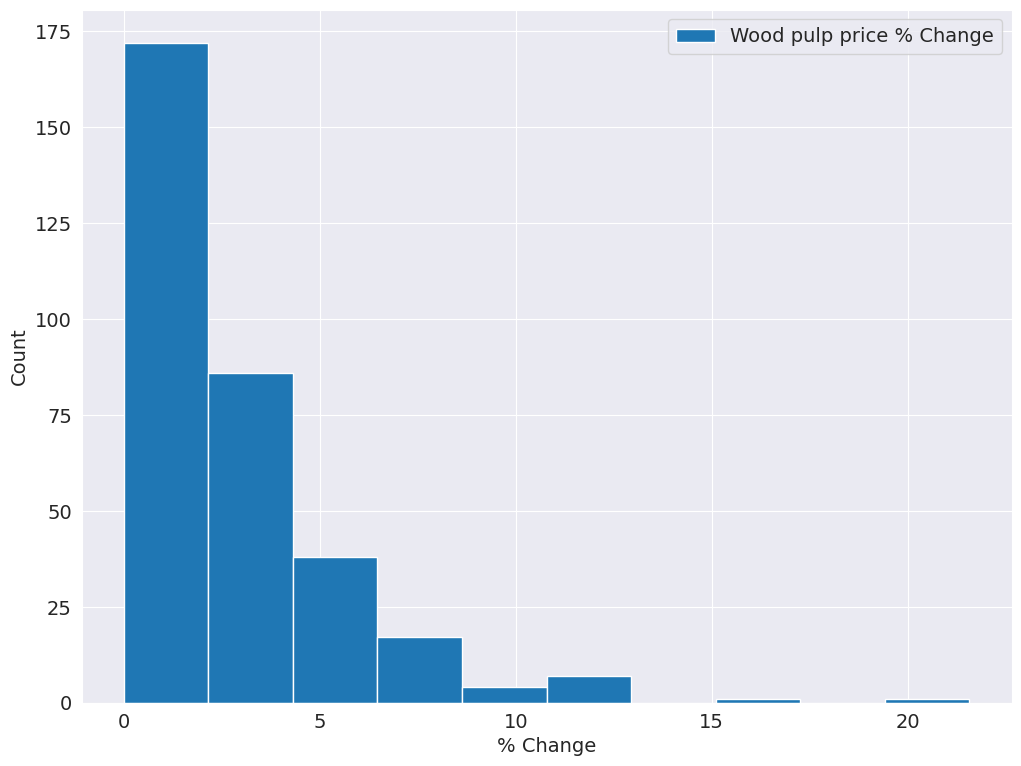

In [19]:
# Lista de variáveis de mudança percentual
changelist = ['Copra price % Change', 'Softlog price % Change', 'Rubber price % Change', 'Cotton price % Change',
              'Coarse wool price % Change', 'Fine wool price % Change', 'Hard log price % Change',
              'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change',
              'Soft sawnwood price % Change', 'Wood pulp price % Change']

# Iterando sobre a lista de variáveis e criando histogramas
for i in range(len(changelist)):
    plt.figure(figsize=(12, 9))

    # Criando histograma para a variável de mudança percentual atual
    df[changelist[i]].hist(linewidth=1)

    # Adicionando rótulos ao eixo x e y
    plt.xlabel('% Change')
    plt.ylabel('Count')

    # Adicionando legenda
    plt.legend([changelist[i]], loc='upper right')

    # Exibindo o histograma
    plt.show()


Podemos observar que a maioria das matérias-primas tem % de mudança frequente ideal inferior a 5%

**Q2: Encontre a matéria-prima que tem o menor preço ao longo dos anos**

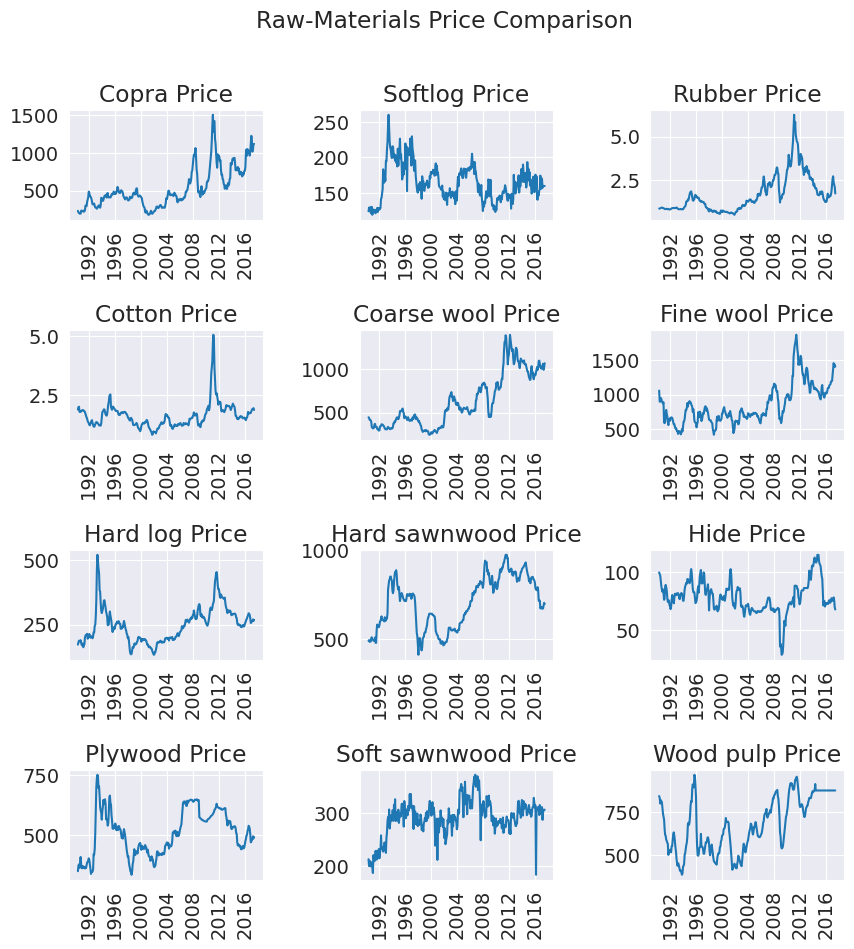

In [20]:
# Tamanho da figura geral
plt.figure(figsize=(10, 10))

# Lista de variáveis de preço de matéria-prima
materialslist = ['Copra Price', 'Softlog Price', 'Rubber Price', 'Cotton Price', 'Coarse wool Price', 'Fine wool Price',
                 'Hard log Price', 'Hard sawnwood Price', 'Hide Price', 'Plywood Price', 'Soft sawnwood Price', 'Wood pulp Price']

# Loop sobre a lista de variáveis
for i in range(len(materialslist)):
    # Criando subplot com 4 linhas e 3 colunas, índice i+1
    plt.subplot(4, 3, i+1)

    # Ajustando espaçamento entre os subplots
    plt.subplots_adjust(hspace=1, wspace=0.5)

    # Adicionando título ao subplot
    plt.title(materialslist[i])

    # Plotando o preço da matéria-prima ao longo do tempo
    plt.plot(df[materialslist[i]])

    # Rotacionando rótulos do eixo x para melhor legibilidade
    plt.xticks(rotation=90)

# Adicionando título geral à figura
plt.suptitle("Raw-Materials Price Comparison")

# Exibindo os subplots
plt.show()


Podemos ver que o algodão e a borracha são de preços mais baixos
vamos comparar preços para entender melhor qual é o mais baixo

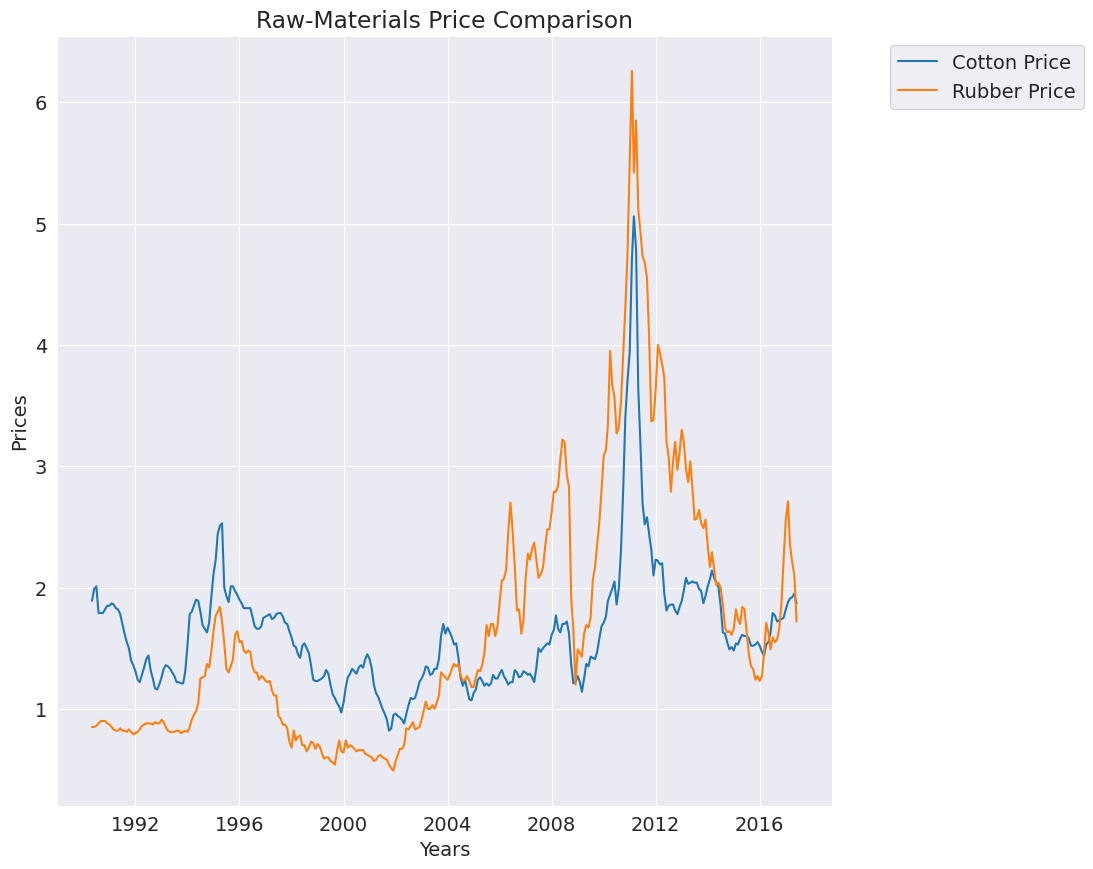

In [21]:
# Configurando o tamanho da figura
plt.figure(figsize=(10, 10))

# Plotando os preços de Cotton Price e Rubber Price
plt.plot(df[['Cotton Price', 'Rubber Price']])

# Adicionando título ao gráfico
plt.title("Raw-Materials Price Comparison")

# Adicionando rótulos aos eixos x e y
plt.xlabel('Years')
plt.ylabel('Prices')

# Adicionando legenda às linhas do gráfico
plt.legend(['Cotton Price', 'Rubber Price'], loc='upper center', bbox_to_anchor=(1.2, 1))

# Exibindo o gráfico
plt.show()


**algodão** é matéria-prima de menor preço nos últimos anos

Tanto o algodão quanto a borracha são materiais de baixo preço

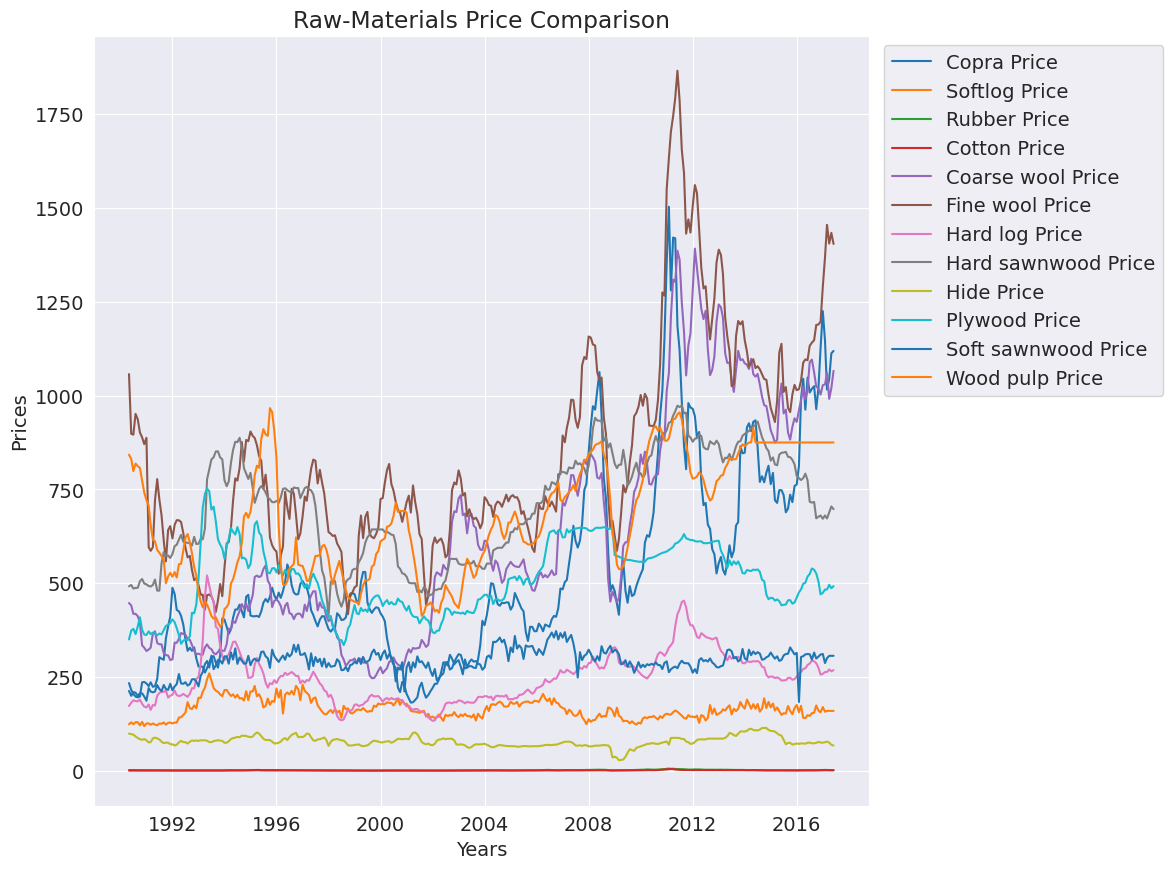

In [22]:
# Configurando o tamanho da figura
plt.figure(figsize=(10, 10))

# Plotando os preços de todas as matérias-primas
plt.plot(df[['Copra Price', 'Softlog Price', 'Rubber Price', 'Cotton Price', 'Coarse wool Price', 'Fine wool Price',
             'Hard log Price', 'Hard sawnwood Price', 'Hide Price', 'Plywood Price', 'Soft sawnwood Price', 'Wood pulp Price']])

# Adicionando título ao gráfico
plt.title("Raw-Materials Price Comparison")

# Adicionando rótulos aos eixos x e y
plt.xlabel('Years')
plt.ylabel('Prices')

# Adicionando legenda às linhas do gráfico
plt.legend(['Copra Price', 'Softlog Price', 'Rubber Price', 'Cotton Price', 'Coarse wool Price', 'Fine wool Price',
            'Hard log Price', 'Hard sawnwood Price', 'Hide Price', 'Plywood Price', 'Soft sawnwood Price', 'Wood pulp Price'],
           loc='upper center', bbox_to_anchor=(1.2, 1))

# Exibindo o gráfico
plt.show()


A partir dos gráficos pudemos analisar as matérias-primas em tipos de acordo com seu preço ao longo dos anos

materiais de baixo preço

-algodão, couro, softlog, log duro, preço de madeira serrada macia, borracha

Materiais de alto preço

-lã grossa,copra,lã fina,madeira serrada dura,pasta de madeira,madeira compensada

**Q3: qual matéria-prima tem a maior e menor variação de % de preço**

In [23]:
import random as random

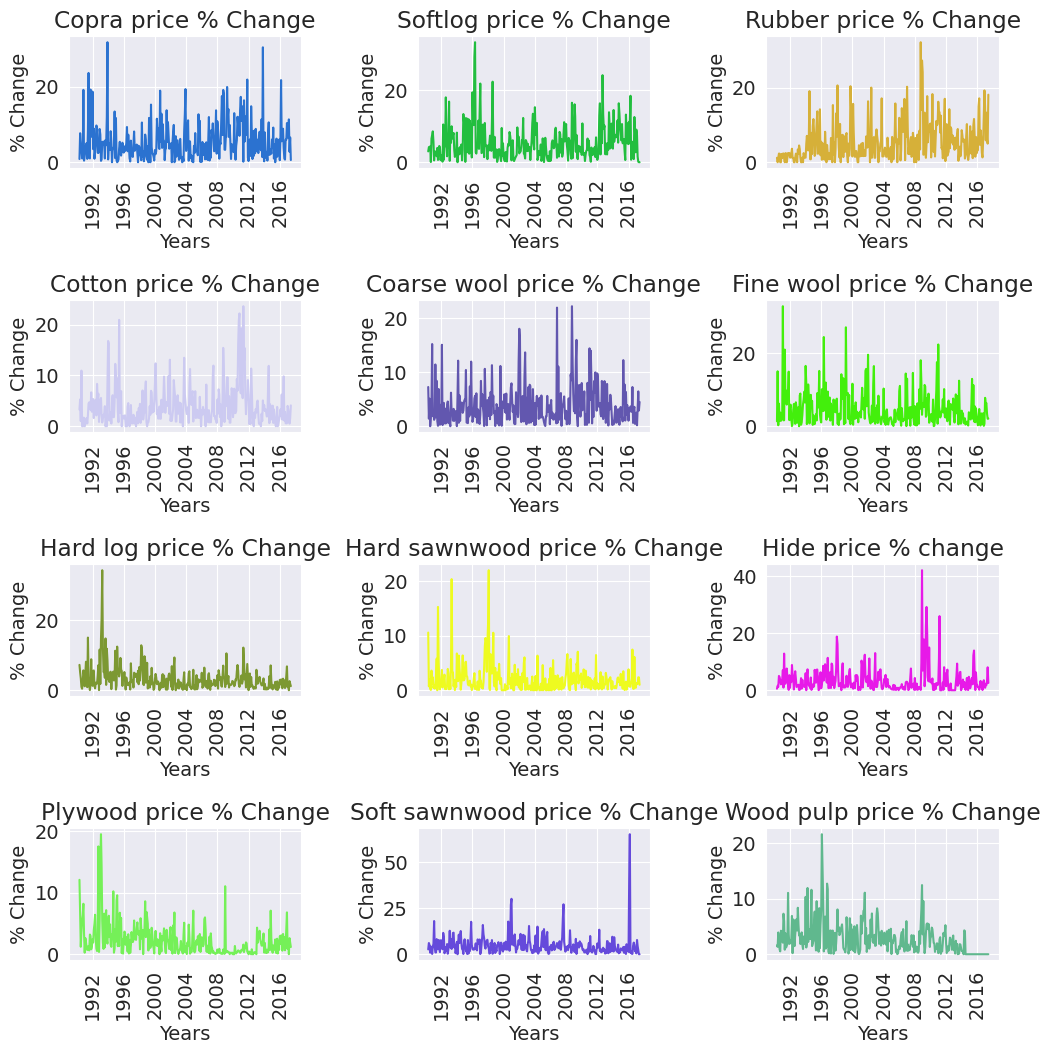

In [24]:
import random

# Lista de variáveis de mudança percentual
changelist = ['Copra price % Change', 'Softlog price % Change', 'Rubber price % Change', 'Cotton price % Change',
              'Coarse wool price % Change', 'Fine wool price % Change', 'Hard log price % Change',
              'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change',
              'Soft sawnwood price % Change', 'Wood pulp price % Change']

# Configurando o tamanho da figura
plt.figure(figsize=(12, 12))

# Loop sobre a lista de variáveis
for i in range(len(changelist)):
    # Gerando cores aleatórias
    color = (random.random(), random.random(), random.random())

    # Criando subplot com 4 linhas e 3 colunas, índice i+1
    plt.subplot(4, 3, i+1)

    # Ajustando espaçamento entre os subplots
    plt.subplots_adjust(hspace=1, wspace=0.5)

    # Plotando a variável de mudança percentual atual
    plt.plot(df[changelist[i]], c=color)

    # Rotacionando rótulos do eixo x para melhor legibilidade
    plt.xticks(rotation=90)

    # Adicionando título ao subplot
    plt.title(changelist[i])

    # Adicionando rótulos aos eixos x e y
    plt.xlabel('Years')
    plt.ylabel('% Change')

# Exibindo os subplots
plt.show()


Podemos ver a maior % de mudança em mais de 60 para madeira serrada macia e a menor % de mudança é para madeira compensada em menos de 20

**Q4: Encontre as matérias-primas com mudança drástica de preço**

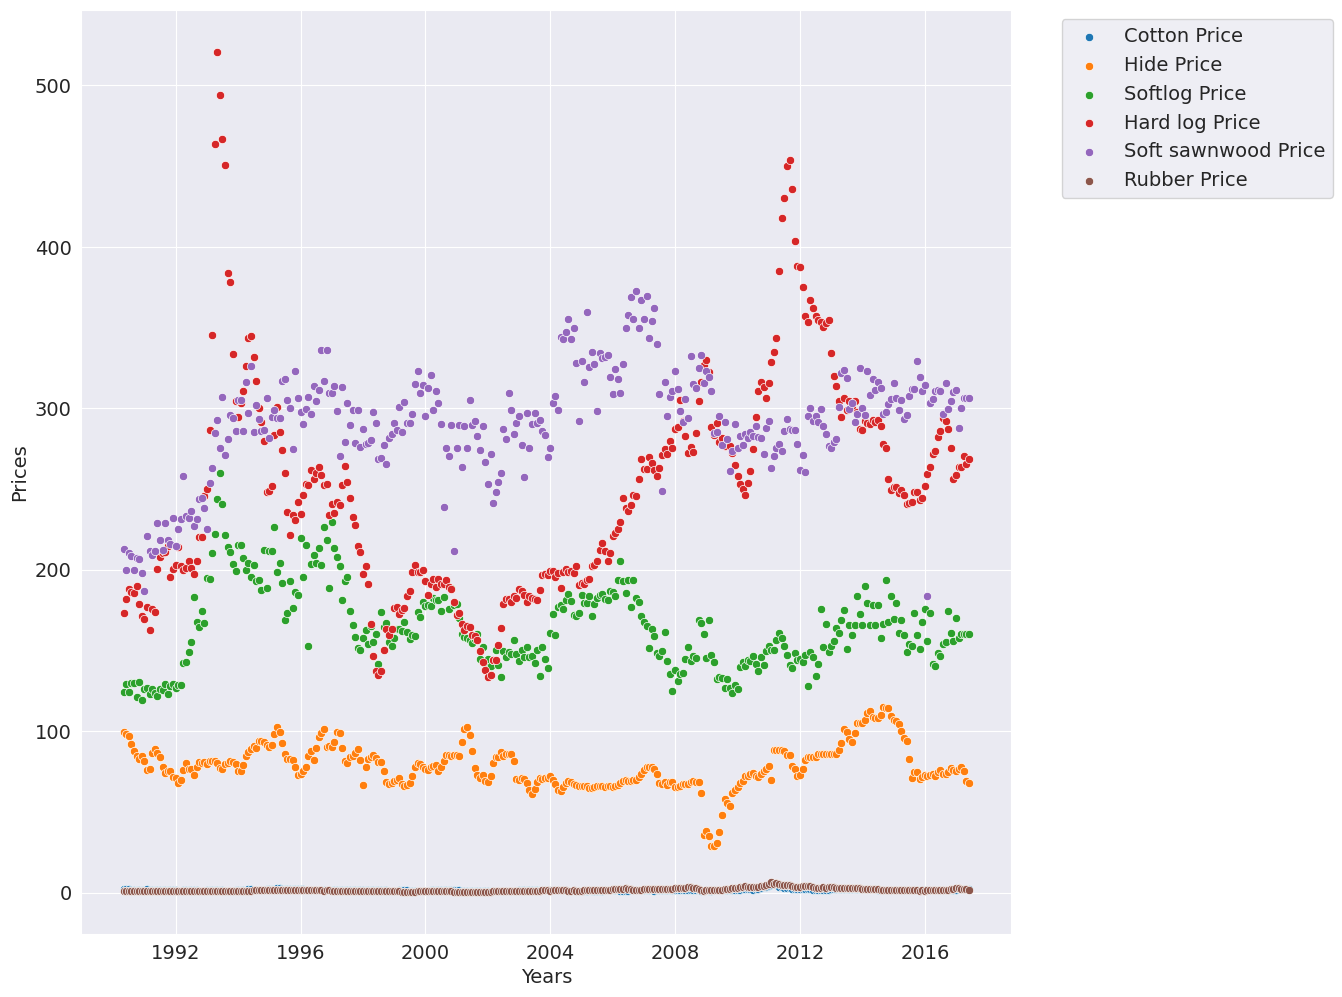

In [25]:
import seaborn as sns

# Lista de variáveis de preço
lowlist = ['Cotton Price', 'Hide Price', 'Softlog Price', 'Hard log Price', 'Soft sawnwood Price', 'Rubber Price']

# Configurando o tamanho da figura
plt.figure(figsize=(12, 12))

# Loop sobre a lista de variáveis
for i in range(len(lowlist)):
    # Criando gráfico de dispersão para a variável de preço atual
    sns.scatterplot(y=df[lowlist[i]], x=df.index, label=lowlist[i])

# Adicionando rótulos aos eixos x e y
plt.xlabel('Years')
plt.ylabel('Prices')

# Adicionando legenda fora do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1))

# Exibindo o gráfico
plt.show()


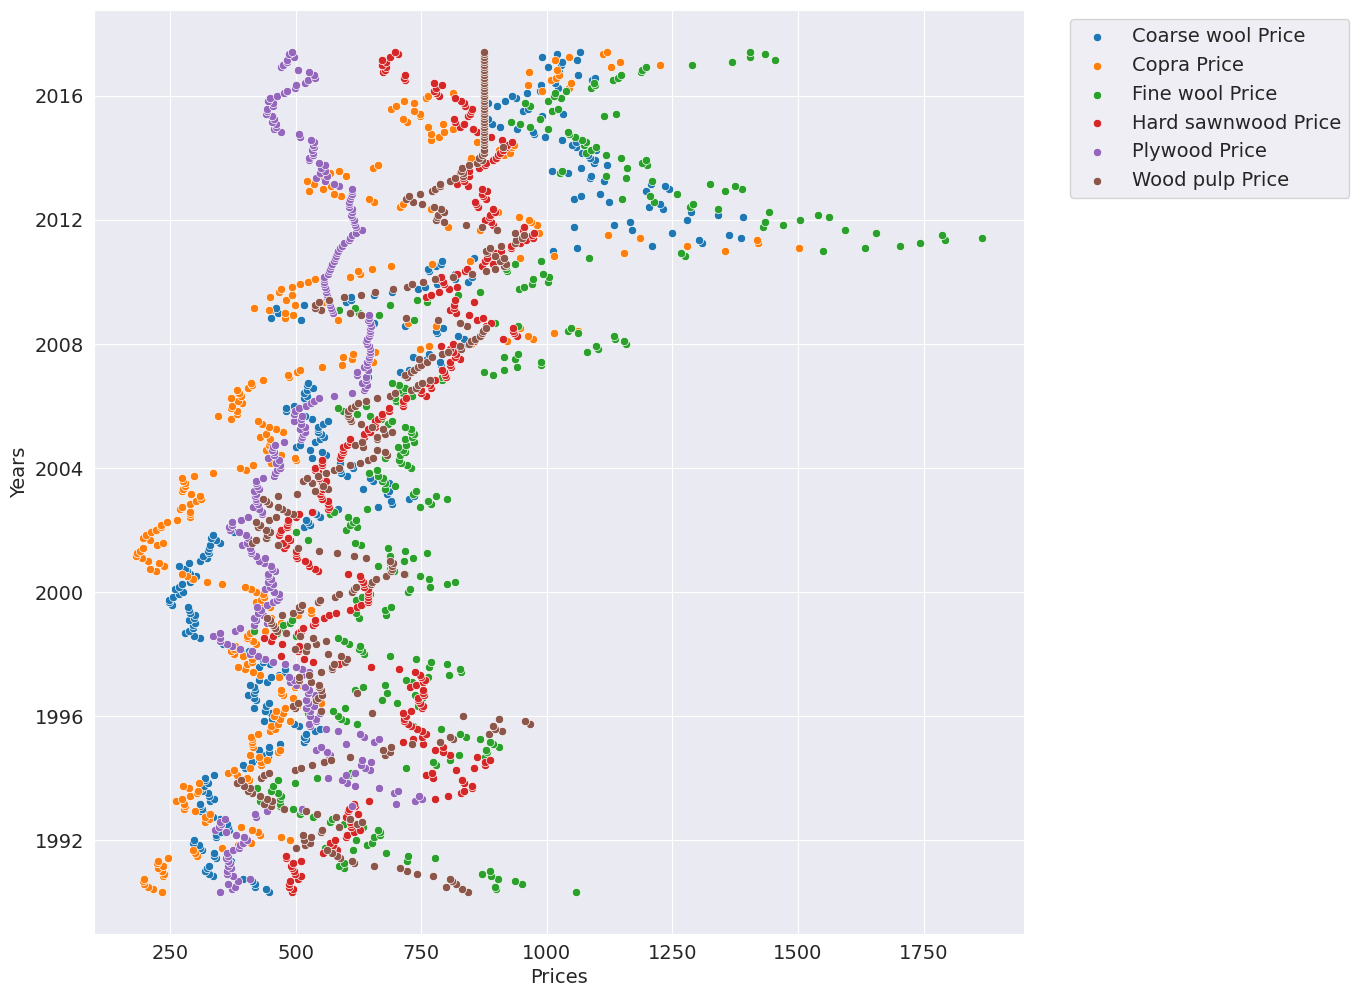

In [26]:
import seaborn as sns

# Lista de variáveis de preço
highlist = ['Coarse wool Price', 'Copra Price', 'Fine wool Price', 'Hard sawnwood Price', 'Plywood Price', 'Wood pulp Price']

# Configurando o tamanho da figura
plt.figure(figsize=(12, 12))

# Loop sobre a lista de variáveis
for i in range(len(highlist)):
    # Criando gráfico de dispersão para a variável de preço atual
    sns.scatterplot(x=df[highlist[i]], y=df.index, label=highlist[i])

# Adicionando rótulos aos eixos x e y
plt.xlabel('Prices')
plt.ylabel('Years')

# Adicionando legenda fora do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1))

# Exibindo o gráfico
plt.show()


A mudança de preço é drástica para o preço de tora dura entre materiais de baixa faixa de preço e entre materiais de alto preço, são os preços de lã fina

**Q5: Descobrir a faixa de preço de matérias-primas de baixo preço**

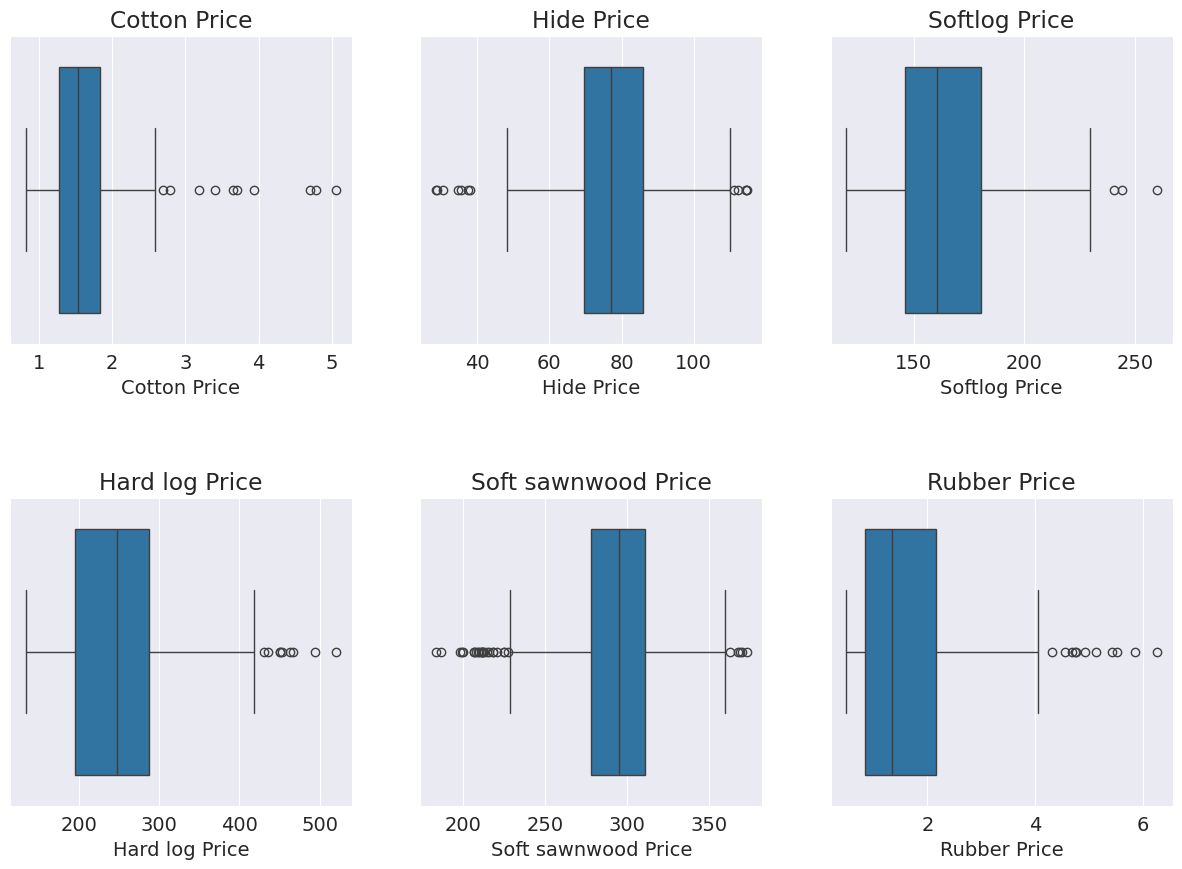

In [27]:
import seaborn as sns

# Lista de variáveis de preço
lowlist = ['Cotton Price', 'Hide Price', 'Softlog Price', 'Hard log Price', 'Soft sawnwood Price', 'Rubber Price']

# Configurando o tamanho da figura
plt.figure(figsize=(15, 10))

# Loop sobre a lista de variáveis
for i in range(6):
    # Criando subplot com 2 linhas e 3 colunas, índice i+1
    plt.subplot(2, 3, i+1)

    # Ajustando espaçamento entre os subplots
    plt.subplots_adjust(hspace=0.5)

    # Adicionando título ao subplot
    plt.title(lowlist[i])

    # Criando boxplot para a variável de preço atual
    sns.boxplot(x=df[lowlist[i]])

# Exibindo os subplots
plt.show()


Inclui: O intervalo interquartil está entre Q3 e Q1 mínimo, primeiro quartil (Q1), mediana, terceiro quartil (Q3) e máximo e outliers


##Inferências e Conclusão##
* Descobrimos as matérias-primas de alta e baixa gama de acordo com seus preços.
* alta e baixa % de variação dos materiais
* Pudemos identificar a variação de preços ao longo dos anos.
* Correlação entre eles usando um mapa de calor

##Trabalho futuro##
*  Além disso, poderíamos descobrir a relação entre as matérias-primas em detalhes e, com a ajuda do conhecimento do negócio, poderíamos descobrir as matérias-primas mais próximas.
*  Também pudemos prever os preços das matérias-primas analisando os anos anteriores

* Prevendo a variação de preços e com base nisso, poderíamos planejar nosso uso de matéria-prima com antecedência para o próximo ano e descobrir quaisquer materiais alternativos.